In [1]:
#1.	Read the dataset, convert it to DataFrame and display some from it.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
dataset=pd.read_csv("Wuzzuf_Jobs.csv")
df = pd.DataFrame(dataset)
df.head()

,Title,Company,Location,Type,Level,YearsExp,Country,Skills
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ..."
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin..."
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ..."
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an..."
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain"


1.	Factorize the YearsExp feature and convert it to numbers in new col.

In [3]:
df['yearsExp_fact'] = pd.factorize(df['YearsExp'])[0]

In [4]:
df

,Title,Company,Location,Type,Level,YearsExp,Country,Skills,yearsExp_fact
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ...",0
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin...",1
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ...",2
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an...",3
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain",4
...,...,...,...,...,...,...,...,...,...
4375,Corporate Sales Executive - Hotel Supplies,Term,New Cairo,Full Time,Experienced,3-7 Yrs of Exp,Cairo,"Corporate Sales, Sales Target, English, Comput...",49
4376,Logistics Operations & Warehouse Supervisor,DHL Express Egypt,Abu Rawash,Full Time,Manager,6+ Yrs of Exp,Giza,"Warehousing, Supply Chain Management, Customs ...",44
4377,English Teacher ( Second Language ) / Lower...,Modern American School of Egypt 2000,New Cairo,Full Time,Experienced,3-7 Yrs of Exp,Cairo,"English Teacher, Lower Primar, Education, Teac...",49
4378,Project Manager - Cairo,KnowledgeNet,Nasr City,Full Time,Manager,5+ Yrs of Exp,Cairo,"Implementation, Project Management, Informatio...",13


2.	Apply K-means for job title and companies

In [5]:
#factorizing data into numerical type to deal with:
df['Title'] = pd.factorize(df['Title'])[0]
df['Company'] = pd.factorize(df['Company'])[0]
#retreving the data to show difference:
df.head(5)

,Title,Company,Location,Type,Level,YearsExp,Country,Skills,yearsExp_fact
0,0,0,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ...",0
1,1,1,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin...",1
2,2,2,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ...",2
3,3,0,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an...",3
4,4,3,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain",4


In [6]:
#scripting the requred data for clustring:
X = df.iloc[:, [0, 1]].values
X.view()

array([[   0,    0],
       [   1,    1],
       [   2,    2],
       ...,
       [2963, 1533],
       [2048,  133],
       [2964, 1533]], dtype=int64)

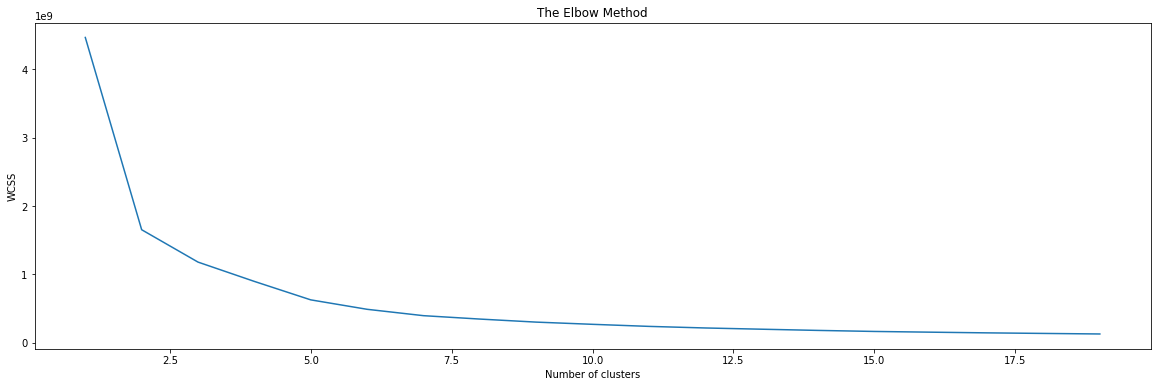

In [7]:
## Using the elbow method to find the optimal number of clusters(k-numbers):
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.subplots(figsize=(20, 6))   
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

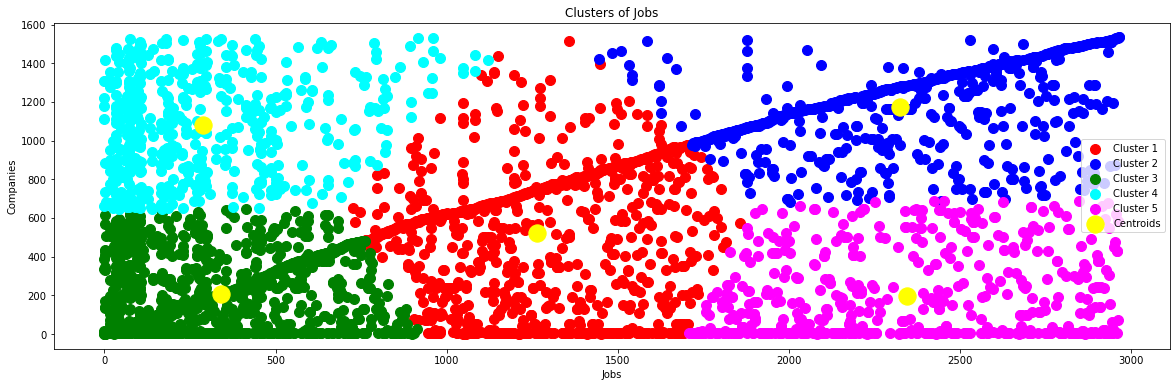

In [8]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans == 0
# Visualising the clusters
plt.subplots(figsize=(20, 6)) 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Jobs')
plt.xlabel('Jobs')
plt.ylabel('Companies')
plt.legend()
plt.show()